# Machine Learning: Use cases in FINTECH

- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.


- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
***

## Note on models Building:
The Model Building Process is composed of multiple parts:
- **Plotting with Matplotlib and Seaborn** - A lot of time will be spent on Exploratory Data Analysis (EDA)
- **Data Manipulation** - We will use Pandas and Numpy for all of our data formatting steps.
- **Classification Models** from Sklearn Library (Logistic Regression, Tree, SVM, ...)
- **K-Fold Cross Validation, Grid Search** (Parameter Tuning), and **Feature Selection** algorithms.
***

## 1. Introduction

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. For this, you need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- **Market:** The target audience is customers who use a company's free product. In this case study, this refers to users who installed (and used) the company's free mobile app.

- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features.

- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership so that greater marketing efforts can go into trying to "convert" them to paid users.
***

## 2. Business Challenge
- In this Case Study, we will be working for a fin-tech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of its app with some of the main features unlocked.


- The company has tasked you to identify which users will most likely NOT enroll in the paid product so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.
****

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("data/appdata10.csv")
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
pd.set_option('display.float', "{:.2f}".format)
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,186889.73,3.03,31.72,21.10,0.11,0.17,0.62,0.17
std,107768.52,2.03,10.80,15.73,0.31,0.38,0.49,0.37
min,13.00,0.00,16.00,1.00,0.00,0.00,0.00,0.00
25%,93526.75,1.00,24.00,10.00,0.00,0.00,0.00,0.00
50%,187193.50,3.00,29.00,18.00,0.00,0.00,1.00,0.00
75%,279984.25,5.00,37.00,28.00,0.00,0.00,1.00,0.00
max,373662.00,6.00,101.00,325.00,1.00,1.00,1.00,1.00


In [4]:
data[data.age > 90]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
19194,149023,2012-11-24 15:00:00.363,5,15:00:00,101,"Credit3Dashboard,Loan2,Home,Credit3Container,C...",34,0,0,1,2012-11-24 15:00:00.411,0
20464,152043,2012-11-23 02:40:18.743,4,02:00:00,100,"joinscreen,Home,YourNetwork,FindFriendsCycle,L...",12,0,0,0,NaN,0
45047,63775,2013-06-07 17:17:13.153,4,17:00:00,100,"Home,Loan1,WebView,Loan3,History,Credit3,Settings",16,0,0,0,NaN,0
48327,308896,2012-11-23 03:48:14.997,4,03:00:00,98,"joinscreen,Credit3Container,ScanPreview,locati...",12,0,0,1,2013-03-08 17:02:30.944,0


In [5]:
data[data.numscreens > 200]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
10834,207023,2012-11-24 15:00:00.346,5,15:00:00,26,"History,Loan1,CC1Category,ProfilePage,ProfileE...",216,0,1,1,2012-11-24 15:00:00.478,0
12723,4147,2012-11-27 15:00:00.358,1,15:00:00,23,"VerifyMobile,ProfilePage,CameraScreen,Settings...",234,0,0,1,2012-11-27 15:00:00.465,0
22975,77695,2012-11-24 15:00:00.355,5,15:00:00,24,"product_review,ProfilePage,AccountView,Institu...",243,0,1,1,2012-12-28 23:18:10.901,0
27660,73887,2012-11-30 15:00:00.359,4,15:00:00,20,"Credit3Dashboard,Credit3Container,Home,Communi...",325,0,0,1,2012-11-30 15:00:01.146,1
46169,196437,2012-12-01 15:00:00.364,5,15:00:00,42,"Saving8,Home,Saving2Amount,ProfilePage,EditPro...",247,0,0,0,NaN,0


In [6]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

## 3. Data Description
- By working for the company, we have access to each customer's app behavior data. This data allows us to see the date and time of app installation, as well as the features the user engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.


- The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trail is over.

| Feature | Description | 
|:-|:-|
| **user** | The client ID number | 
| **first_open** | The date and time, the user first open the app |
| **dayofweek** | The day in numerical form (0: Sunday,..., 6: Saturday) |
| **hour** | The hour of first open in 24h format |
| **age** | The age of the user |
| **screen_lists** | Describes every single screen name the user has set in this 24-hours |
| **numscreens** | The number of screens apairs in screen_lists |
| **minigame** | The app has a mini-game, if the user played in the 24h it is set to 1, otherwise, it is set to 0 |
| **liked** | If the user liked any feature of the app it is set to 1, otherwise, it is set to 0 |
| **used_premium_features** | The user usage of the free trial of premium features is set to 1, otherwise, it is set to 0 |
| **enrolled** | This is the target column. If the user has enrolled in the premium offer it is set to 1, otherwise, it is set to 0 |
| **enrolled_date** | The date of enrollement if they did |

## 4. Exploratory Data Analysis (EDA)

In [7]:
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

All features don't have missing values except `enrolled_date` because not all user enroll in the premium app. So we have 18926 users how doesn't enrolled.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

We notice that `first_open`, `hour`,  and `enrolled_date` are `datetime` objects but in our dataset they are `object` type. So we need to convert them.

In [10]:
data.drop_duplicates(keep="first", inplace=True)
data.shape

(49985, 12)

In [11]:
data["first_open"] = pd.to_datetime(data["first_open"], yearfirst=True)
data["enrolled_date"] = pd.to_datetime(data["enrolled_date"], yearfirst=True)
data["hour"] = data.hour.str.slice(1, 3).astype(int)

In [12]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

### Visualisation of the Features distributions

- A **distribution** is a function that shows the possible values for a variable and the probability of their occurrence. Best way to visualize our data is through `histograms`, 
- A **histogram** is a type of bar chart that represents numerical data. It is divided into intervals (or bins) that are not overlapping and span from the first observation to the last. The intervals (bins) are adjacent - where one stops, the other starts.

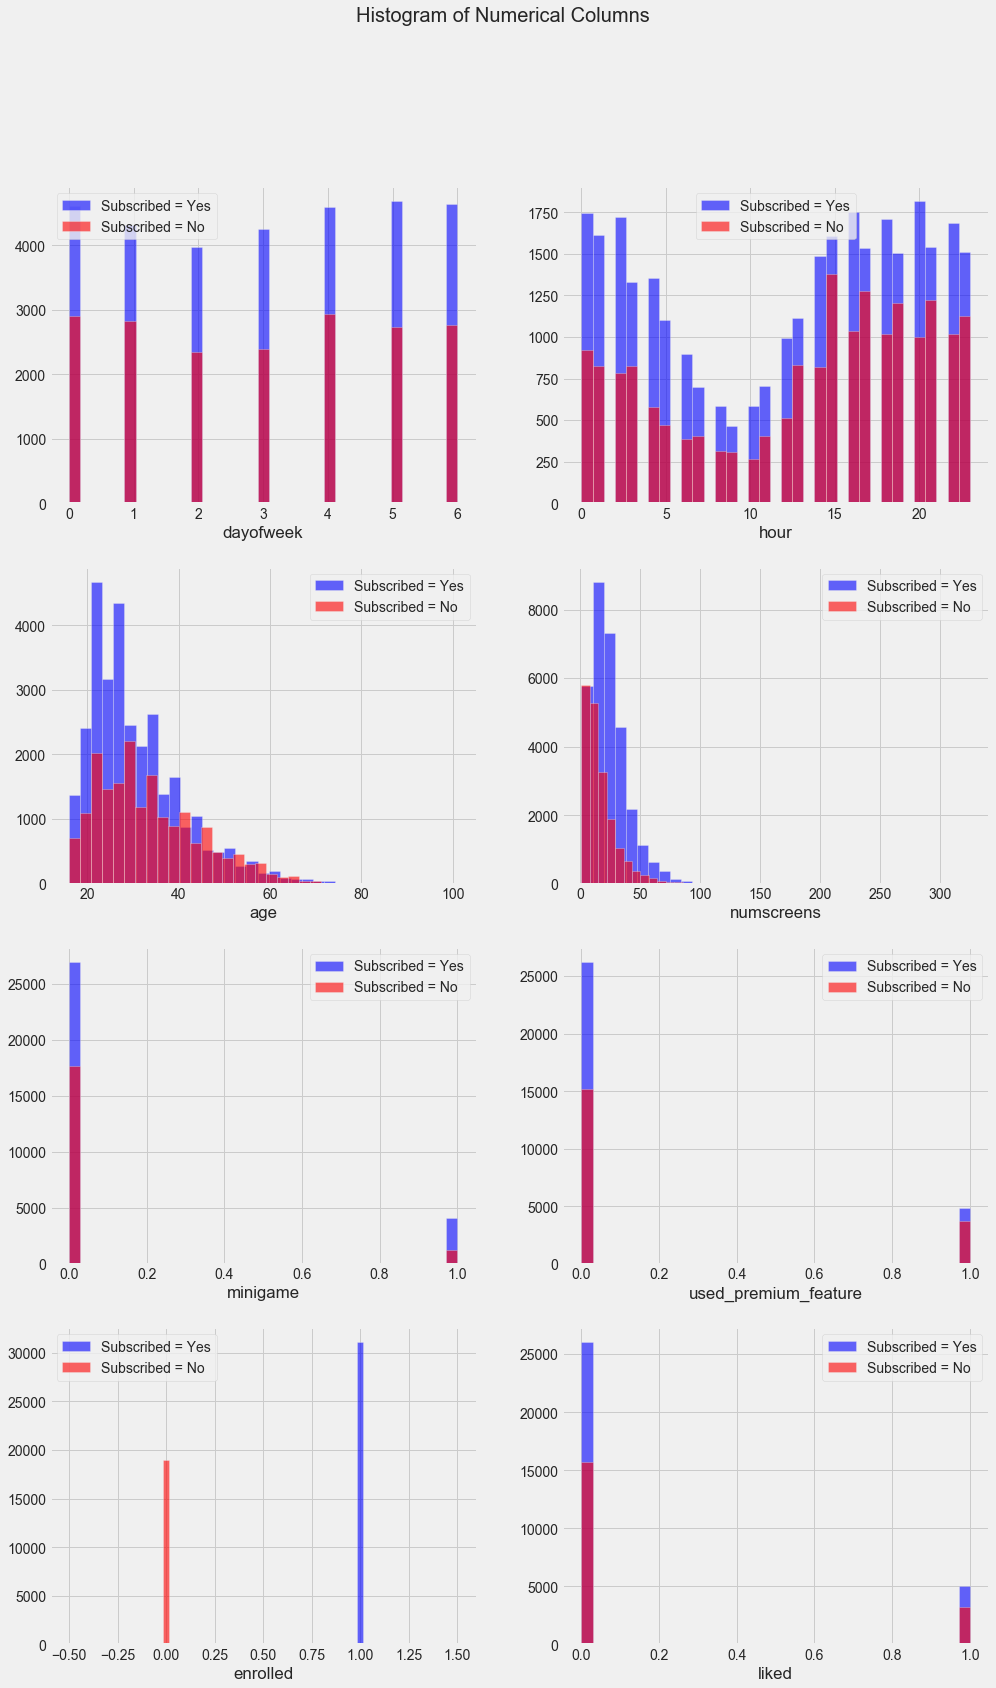

In [13]:
del_col = ['user', 'screen_list', 'enrolled_date', 'first_open']
columns = data.drop(del_col, axis=1).columns

plt.figure(figsize=(15, 25))
plt.suptitle("Histogram of Numerical Columns", fontsize=20)

for i, column in enumerate(columns, 1):
    plt.subplot(4, 2, i)
    data[data["enrolled"] == 1][column].hist(bins=35, color='blue', label='Subscribed = Yes', alpha=0.6)
    data[data["enrolled"] == 0][column].hist(bins=35, color='red', label='Subscribed = No', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [14]:
data.enrolled.value_counts()

1    31067
0    18918
Name: enrolled, dtype: int64

### Correlation analysis

**Correlation:** Correlation is a measure of the joint variability of two variables. correlation could be thought of as a standardized measure. It takes on values between -1 and 1, thus it is easy for us to interpret the result.
   - A correlation of 1, known as perfect positive correlation, means that one variable is perfectly explained by the other.
   - A correlation of 0 means that the variables are independent.
   - A correlation of -1, known as perfect negative correlation, means that one variable is explaining the other one perfectly, but they move in opposite directions.

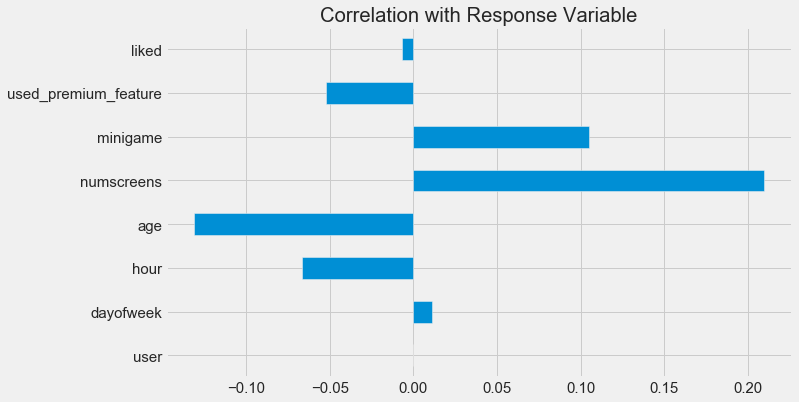

In [15]:
data.drop('enrolled', axis=1).corrwith(data.enrolled).plot.barh(figsize=(10, 6), 
                                      title='Correlation with Response Variable',
                                      fontsize=15, rot=0, grid=True)

- `hour`, `age`, `used_premium_feature`, and `liked` are negatively correlated with `enrolled`, that's means that the more those parameter increase, the less likely that the user register for premium offer.

- `numscreens` and `minigame` are positively correlated with `enrolled`, that's means that the more those parameter increase, the more likely that the user register for premium offer.

- The most interesting remark from the graph is that  `used_premium_feature` is negatively correlated with `enrolled`. Users who used the premium feature are convinced that the product doesn't worth the price.

In [16]:
pd.set_option('display.float_format', '{:.2}'.format)
data.corr()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.0,-0.0025,-0.012,-0.0034,4.8e-05,0.0065,0.0041,-0.00053,0.0074
dayofweek,-0.0025,1.0,0.013,-0.012,0.008,-0.0086,0.0016,0.011,-0.0057
hour,-0.012,0.013,1.0,0.019,-0.077,-0.0091,0.023,-0.067,-0.0017
age,-0.0034,-0.012,0.019,1.0,-0.13,0.02,0.0042,-0.13,-0.0026
numscreens,4.8e-05,0.008,-0.077,-0.13,1.0,0.041,0.062,0.21,-0.0074
minigame,0.0065,-0.0086,-0.0091,0.02,0.041,1.0,0.11,0.1,-0.012
used_premium_feature,0.0041,0.0016,0.023,0.0042,0.062,0.11,1.0,-0.053,0.0017
enrolled,-0.00053,0.011,-0.067,-0.13,0.21,0.1,-0.053,1.0,-0.0071
liked,0.0074,-0.0057,-0.0017,-0.0026,-0.0074,-0.012,0.0017,-0.0071,1.0


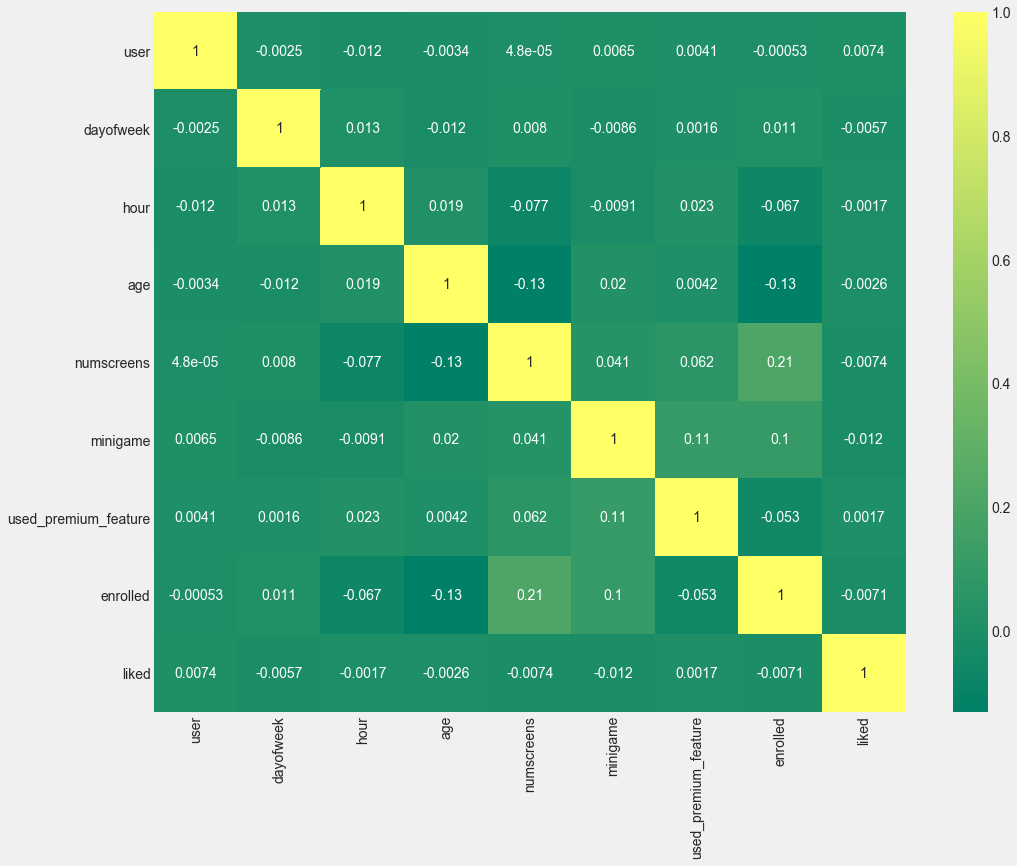

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, cmap='summer')

## 5. Feature Engineering

We need to set a time limit to the user to register for the primium offer. To do so, we need to know the average time for a user to register.

We need to mesure the difference between `first_open` and `enrolled_date`, save it in  new column `difference`.

In [18]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')
data.sample(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
29118,299077,2013-06-01 04:58:41.583,5,4,21,"Splash,Home,Loan2,product_review,product_revie...",23,0,1,1,2013-06-01 05:00:54.612,0,0.0
2216,46201,2013-03-17 14:44:13.804,6,14,26,"joinscreen,Home,Institutions,SelectInstitution...",18,0,0,1,2013-03-17 15:08:35.169,0,0.0
5185,362926,2013-02-23 08:29:11.495,5,8,55,"joinscreen,product_review,product_review2,Scan...",12,0,0,1,2013-02-23 14:02:09.503,0,5.0
25735,61018,2013-01-01 15:04:35.844,1,15,38,"Home,Institutions,product_review,location,Veri...",13,0,0,1,2013-02-25 21:11:21.776,1,1.3e+03
37383,138230,2013-02-14 18:29:15.549,3,18,64,"joinscreen,product_review,product_review2,Scan...",27,0,0,1,2013-02-14 18:35:04.674,1,0.0
30892,177723,2013-05-10 16:08:15.747,4,16,32,"Splash,Cycle,Home,ScanPreview,location,VerifyD...",22,0,0,1,2013-05-10 16:10:05.201,0,0.0
31941,260137,2013-06-20 20:48:02.464,3,20,33,"idscreen,Home,product_review,product_review,pr...",36,0,0,0,NaT,0,nan
15091,123827,2013-02-18 19:02:39.522,0,19,59,"joinscreen,product_review,product_review2,Scan...",9,0,0,0,NaT,0,nan
15338,74488,2013-02-22 06:37:18.369,4,6,56,"idscreen,joinscreen,Cycle,product_review,produ...",12,0,0,1,2013-02-23 10:03:12.127,0,2.7e+01
34098,305135,2013-05-22 05:18:59.416,2,5,35,"Splash,Cycle,product_review,product_review,pro...",25,0,0,0,NaT,0,nan


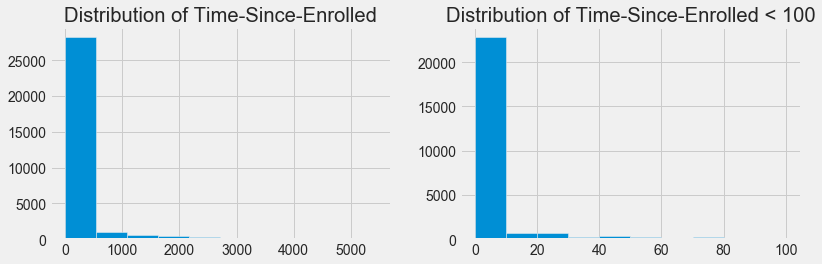

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(data['difference'].dropna())
plt.title('Distribution of Time-Since-Enrolled');

plt.subplot(2, 2, 2)
plt.hist(data['difference'].dropna(), range=[0, 100])
plt.title('Distribution of Time-Since-Enrolled < 100');

We notice that most of the users enroll within the first `20 hours`. `48 hours` is a good cat-off time to test the response of the users. So every user that enrolled after `48 hours` will be considered as Non-enrolled.

In [20]:
data.loc[data.difference > 48, 'enrolled'] = 0

Now, we no-longer need 'difference', 'enrolled_date', and 'first_open' so we will drop them.

In [21]:
data.drop(columns=['difference', 'enrolled_date', 'first_open'], axis=1, inplace=True)

Now, we are going to analyze the `screen_list` feature. We can find the most important features (The feature that communly used by the users) by count them.

In [22]:
from collections import Counter

list_of_screens = Counter()
for screens in data.screen_list.str.split(','):
    list_of_screens.update(screens)

print(f'We have {len(list_of_screens)} types of screens.')  

top_screens = [screen[0] for screen in list_of_screens.most_common(58)]

print(sorted(top_screens))

We have 137 types of screens.
['AccountView', 'Alerts', 'BankVerification', 'CC1', 'CC1Category', 'CC3', 'CommunityAndInvites', 'Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard', 'Cycle', 'EditProfile', 'Finances', 'GroupedInstitutions', 'History', 'Home', 'Institutions', 'Leaderboard', 'Loan1', 'Loan2', 'Loan3', 'MLWebView', 'ProfileChildren', 'ProfileEducation', 'ProfileEducationMajor', 'ProfileMaritalStatus', 'ProfilePage', 'ProfileVerifySSN', 'ReferralContainer', 'RewardDetail', 'Rewardjoinscreen', 'RewardsContainer', 'Saving1', 'Saving10', 'Saving4', 'Saving7', 'Saving8', 'Saving9', 'ScanPreview', 'SelectInstitution', 'Settings', 'Splash', 'VerifyCountry', 'VerifyDateOfBirth', 'VerifyHousing', 'VerifyHousingAmount', 'VerifyMobile', 'VerifyPhone', 'VerifySSN', 'VerifyToken', 'idscreen', 'joinscreen', 'location', 'product_review', 'product_review2', 'product_review3']


We need to create a column for each of those top screens

In [23]:
data["screen_list"] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc + ',', '')

In [24]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,VerifyHousingAmount,ProfileEducationMajor,ProfileVerifySSN,GroupedInstitutions,History,RewardDetail,CC3,Rewardjoinscreen,Saving7,AccountView
0,235136,3,2,23,"ProfileForgotPassword,Login,",15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,333588,6,1,24,,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,"Loan,",3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"Rewards,",40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,51549,1,18,31,,32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


To get value of the left screens, we'll create a new column `other` that saves the number of left screens.

In [25]:
data['other'] = data.screen_list.str.count(',')

In [26]:
data.drop('screen_list', axis=1, inplace=True)

In [27]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,ProfileEducationMajor,ProfileVerifySSN,GroupedInstitutions,History,RewardDetail,CC3,Rewardjoinscreen,Saving7,AccountView,other
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


The `saving` columns are highly correlated, so we need to delete them. But before so we need to create a `SavingsCount` feature. The same for `Credit`, `CreditCards`, and `Loan`

In [28]:
savings_screens = ["Saving1", "Saving4", "Saving7", "Saving8", "Saving9", "Saving10"]

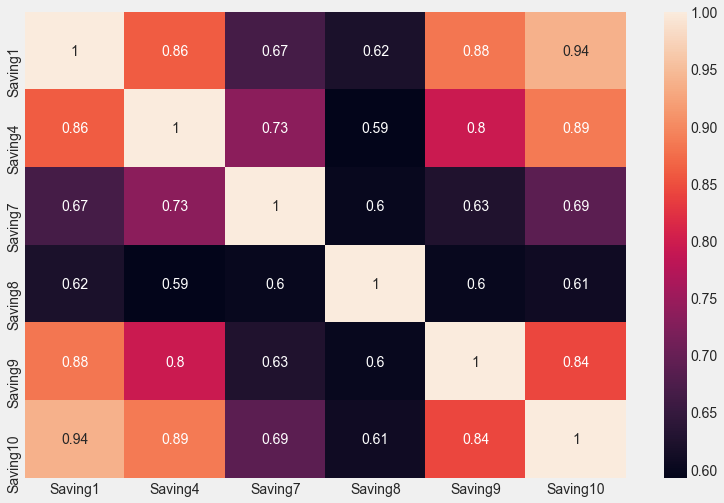

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[savings_screens].corr(), annot=True)

In [30]:
data['SavingsCount'] = data[savings_screens].sum(axis=1)
data.drop(savings_screens, axis=1, inplace=True)

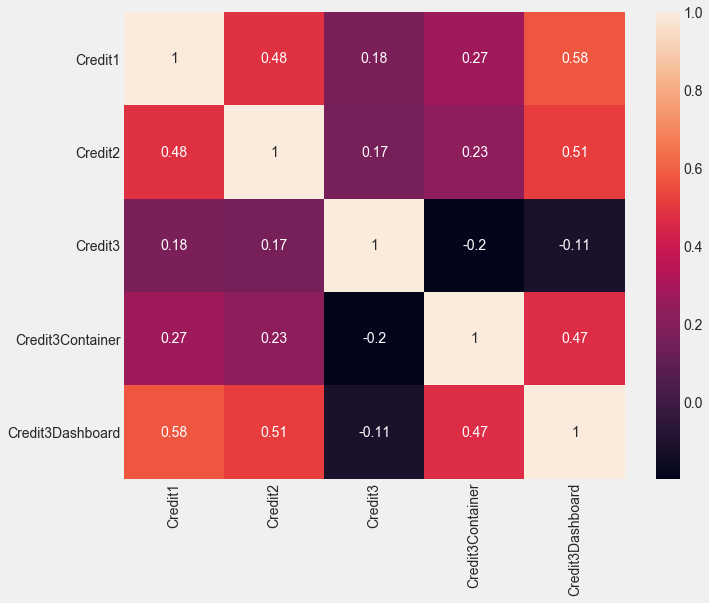

In [31]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(data[cm_screens].corr(), annot=True)

In [32]:
data.drop(cm_screens, axis=1, inplace=True)

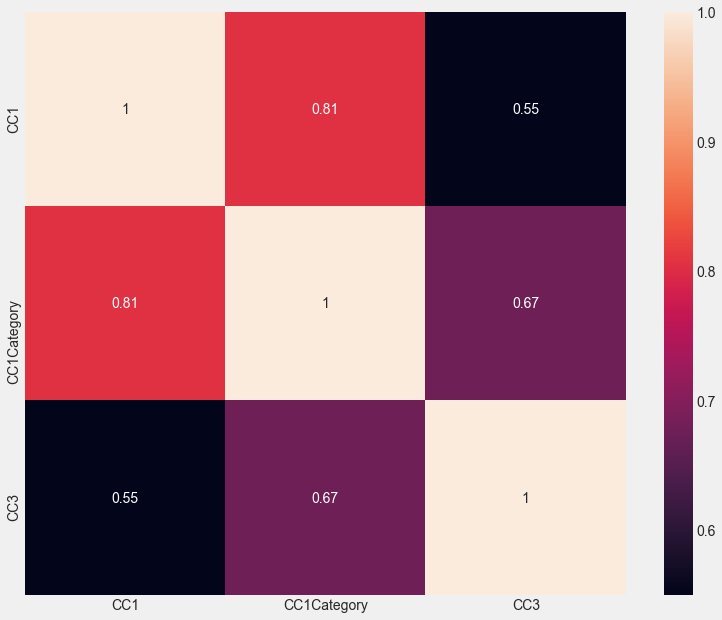

In [33]:
cc_screens = ["CC1", "CC1Category", "CC3"]
data['CCCount'] = data[cc_screens].sum(axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data[cc_screens].corr(), annot=True)

In [34]:
data.drop(cc_screens, axis=1, inplace=True)

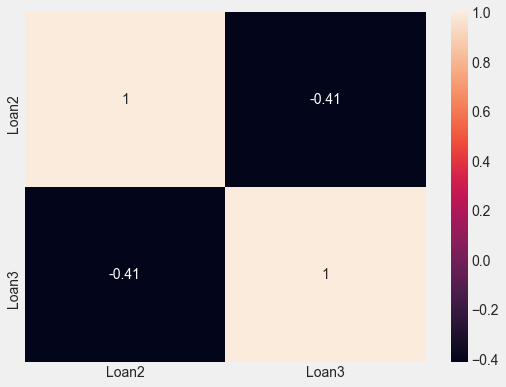

In [35]:
loan_screens = ["Loan2", "Loan3"]
data["LoansCount"] = data[loan_screens].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(data[loan_screens].corr(), annot=True)

In [36]:
data.drop(loan_screens, axis=1, inplace=True)

In [37]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,GroupedInstitutions,History,RewardDetail,Rewardjoinscreen,AccountView,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,2,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,1,0,0,1,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,2,0,1


In [38]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,...,GroupedInstitutions,History,RewardDetail,Rewardjoinscreen,AccountView,other,SavingsCount,CMCount,CCCount,LoansCount
count,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,...,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04,5e+04
mean,1.9e+05,3.0,1.3e+01,3.2e+01,2.1e+01,0.11,0.17,0.5,0.17,0.71,...,0.0,0.032,0.031,0.0,0.026,0.53,0.29,0.93,0.18,0.65
std,1.1e+05,2.0,7.4,1.1e+01,1.6e+01,0.31,0.38,0.5,0.37,0.45,...,0.0,0.18,0.17,0.0,0.16,1.3,1.1,1.2,0.62,0.48
min,1.3e+01,0.0,0.0,1.6e+01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.4e+04,1.0,5.0,2.4e+01,1e+01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.9e+05,3.0,1.4e+01,2.9e+01,1.8e+01,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,2.8e+05,5.0,1.9e+01,3.7e+01,2.8e+01,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
max,3.7e+05,6.0,2.3e+01,1e+02,3.2e+02,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.8e+01,6.0,5.0,3.0,2.0


## 6. Data Pre-Processing

In [39]:
def map_age(age):
    if 25 > age >= 16:
        return 1
    elif 30 > age >= 25:
        return 2
    elif 40 > age >= 30:
        return 3
    elif 50 > age >= 40:
        return 4
    elif 60 > age >= 50:
        return 5
    elif age >= 60:
        return 6

In [40]:
data['age'] = data.age.apply(map_age)

In [41]:
data = pd.get_dummies(data, columns=['dayofweek', 'age'], drop_first=True)
data.head()

,user,hour,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,Home,ScanPreview,...,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,age_2,age_3,age_4,age_5,age_6
0,235136,2,15,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,333588,1,13,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,254414,19,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,16,40,0,0,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,0
4,51549,18,32,0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [42]:
user_id = data.user
data.drop('user', axis=1, inplace=True)

In [43]:
print(data.shape)

(49985, 64)


In [44]:
# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

In [45]:
print(data.shape)

(49843, 62)


In [46]:
X = data.drop('enrolled', axis=1)
y = data.enrolled

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33394, 61)
(16449, 61)
(33394,)
(16449,)


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

# 7. Model Building

## 7. 1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.73%
_______________________________________________
Classification Report:	Precision Score: 85.84%
			Recall Score: 80.64%
			F1 score: 83.16%
_______________________________________________
Confusion Matrix: 
 [[14550  2213]
 [ 3220 13411]]

Test Result:
Accuracy Score: 83.91%
_______________________________________________
Classification Report:	Precision Score: 86.00%
			Recall Score: 80.74%
			F1 score: 83.29%
_______________________________________________
Confusion Matrix: 
 [[7209 1073]
 [1573 6594]]



In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X, y, cv=5)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Logistic Accuracy: 83.77% +/- (0.28)


In [51]:
pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(lr_classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,hour,0.00013
1,numscreens,0.0095
2,minigame,-0.13
3,used_premium_feature,-0.15
4,enrolled,0.0022
...,...,...
57,age_2,-0.18
58,age_3,-0.31
59,age_4,-0.52
60,age_5,-0.23


## 7. 2. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:	Precision Score: 99.98%
			Recall Score: 99.94%
			F1 score: 99.96%
_______________________________________________
Confusion Matrix: 
 [[16759     4]
 [   10 16621]]

Test Result:
Accuracy Score: 84.02%
_______________________________________________
Classification Report:	Precision Score: 85.59%
			Recall Score: 81.55%
			F1 score: 83.52%
_______________________________________________
Confusion Matrix: 
 [[7161 1121]
 [1507 6660]]



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()
# classifier.fit(X_train, y_train)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"], 
              'n_estimators':[100, 500, 1000, 1500]}

rf_grid_search_cv = GridSearchCV(classifier, param_grid, scoring="accuracy", 
                                 n_jobs=-1, verbose=1, cv=3)
# rf_grid_search_cv.fit(X_train, y_train)

In [54]:
# rf_grid_search_cv.best_estimator_

In [55]:
rand_forest = RandomForestClassifier(bootstrap=False, 
                                     criterion='entropy', 
                                     max_depth=None, 
                                     min_samples_leaf=3, 
                                     min_samples_split=2,
                                     n_estimators=500)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.45%
_______________________________________________
Classification Report:	Precision Score: 93.32%
			Recall Score: 89.22%
			F1 score: 91.22%
_______________________________________________
Confusion Matrix: 
 [[15700  1063]
 [ 1792 14839]]

Test Result:
Accuracy Score: 84.41%
_______________________________________________
Classification Report:	Precision Score: 86.48%
			Recall Score: 81.32%
			F1 score: 83.82%
_______________________________________________
Confusion Matrix: 
 [[7244 1038]
 [1526 6641]]



In [56]:
scores = cross_val_score(rand_forest, X, y, cv=5)
print(f"Random Forest Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Random Forest Accuracy: 84.21% +/- (0.37)


## 7. 3. XGBoost Classifier

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.00%
_______________________________________________
Classification Report:	Precision Score: 86.40%
			Recall Score: 80.55%
			F1 score: 83.37%
_______________________________________________
Confusion Matrix: 
 [[14655  2108]
 [ 3235 13396]]

Test Result:
Accuracy Score: 84.17%
_______________________________________________
Classification Report:	Precision Score: 86.55%
			Recall Score: 80.65%
			F1 score: 83.50%
_______________________________________________
Confusion Matrix: 
 [[7258 1024]
 [1580 6587]]



In [58]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50, scoring = 'accuracy',n_jobs =-1,
                               verbose = 5, return_train_score = True, random_state=42)


# xgb_cv.fit(X_train, y_train)

In [59]:
# xgb_cv.best_estimator_

In [60]:
xgb = XGBClassifier(base_score=0.25, 
                    booster='gbtree',
                    learning_rate=0.15, 
                    max_depth=2,
                    min_child_weight=3, 
                    n_estimators=1500)
xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.74%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 81.32%
			F1 score: 84.15%
_______________________________________________
Confusion Matrix: 
 [[14774  1989]
 [ 3107 13524]]

Test Result:
Accuracy Score: 84.36%
_______________________________________________
Classification Report:	Precision Score: 86.40%
			Recall Score: 81.29%
			F1 score: 83.77%
_______________________________________________
Confusion Matrix: 
 [[7237 1045]
 [1528 6639]]



In [61]:
scores = cross_val_score(xgb, X, y, cv=5)
print(f"XGBoost Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

XGBoost Accuracy: 84.17% +/- (0.34)


## 7. 4. Support Vector Machine Classifier

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.02%
_______________________________________________
Classification Report:	Precision Score: 86.33%
			Recall Score: 80.70%
			F1 score: 83.42%
_______________________________________________
Confusion Matrix: 
 [[14637  2126]
 [ 3210 13421]]

Test Result:
Accuracy Score: 84.16%
_______________________________________________
Classification Report:	Precision Score: 86.36%
			Recall Score: 80.86%
			F1 score: 83.52%
_______________________________________________
Confusion Matrix: 
 [[7239 1043]
 [1563 6604]]



In [63]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 63.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 266.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [64]:
grid_cv.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
svc = SVC(C=100, gamma=0.01, kernel='rbf')
svc.fit(X_train, y_train)

print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.95%
_______________________________________________
Classification Report:	Precision Score: 86.22%
			Recall Score: 80.67%
			F1 score: 83.35%
_______________________________________________
Confusion Matrix: 
 [[14619  2144]
 [ 3215 13416]]

Test Result:
Accuracy Score: 84.17%
_______________________________________________
Classification Report:	Precision Score: 86.38%
			Recall Score: 80.86%
			F1 score: 83.53%
_______________________________________________
Confusion Matrix: 
 [[7241 1041]
 [1563 6604]]



****
# 8. Conclusion

- Our efforts have given us a model that will label every new user as "highly likely" (or "unlikely") to subscribe. We can further validate our results by running our predictions on daily new installs, and see whether our accuracy is consistent. From there, we can narrow our marketing efforts only to those users "unlikely" to subscribe, and thus increase our subscription rate.
- The increase in overall subscriptions can measure the benefits of this model to the company. Recall that those already likely to subscribe will do so, and although we can still give them offers, we don't have to go all out. On the other hand, users who are likely to leave may convert to paid subscribers if we give them an offer they cannot refuse. For example, these offers can come in the form of "1st month free", or "50% off yearly subscriptions". The latter shows that great offers can still be structured in a way that brings overall benefits to the company because we are locking the user in for an extended period.